# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

# if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
#     !git clone https://github.com/alexmelekhin/cv_course_2023.git
#     !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

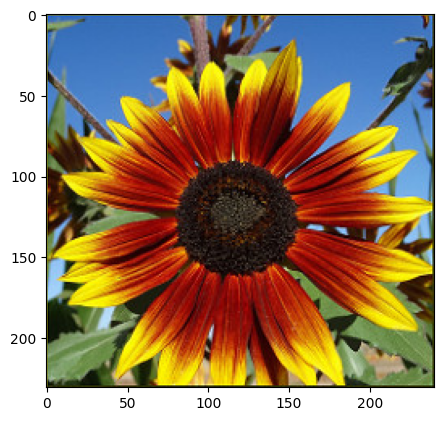

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

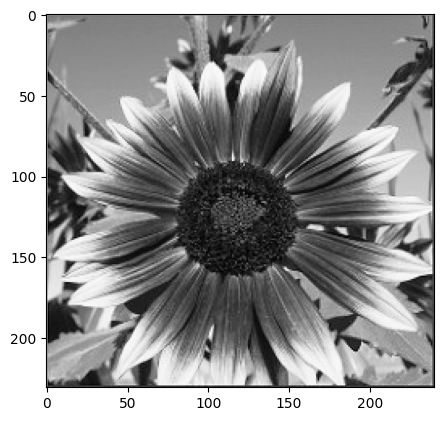

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

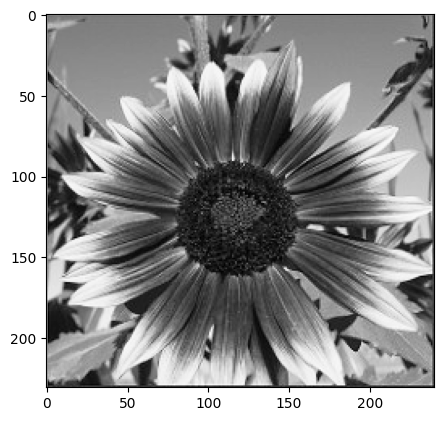

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [11]:
def convert_rgb_to_grayscale(img_rgb):
    # img = np.dot(img_rgb[..., :3], [0.29901, 0.58701, 0.1140])
    # img = np.dot(img_rgb[..., :3], [0.29902, 0.58702, 0.11402282910111])
    img = np.round(img_rgb[:,:,0] * 0.29901 + img_rgb[:,:,1] * 0.58701 + img_rgb[:,:,2] * 0.1140)
    ori = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    print('diff = ', (img - ori).sum())
    return img

In [12]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

diff =  0.0


## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:**

Это м.б. неэффективным из-за потери информации о цветах и контрасте: сохраняется только яркость пикселей, отбрасывая информацию о цвете, потеря контраста, а так же не учитывается восприятие яркости человеческим глазом.

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

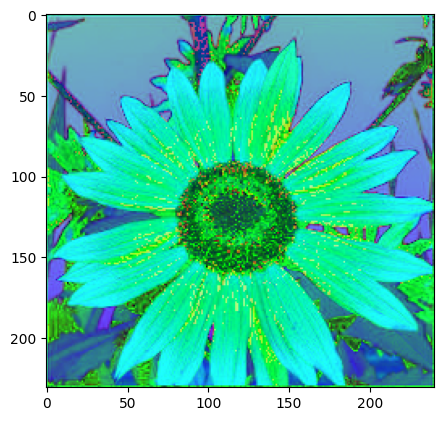

In [14]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

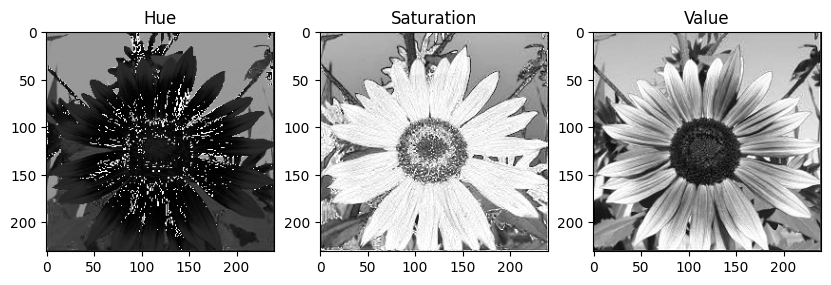

In [15]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

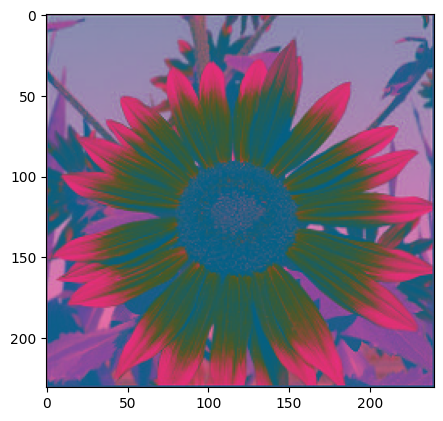

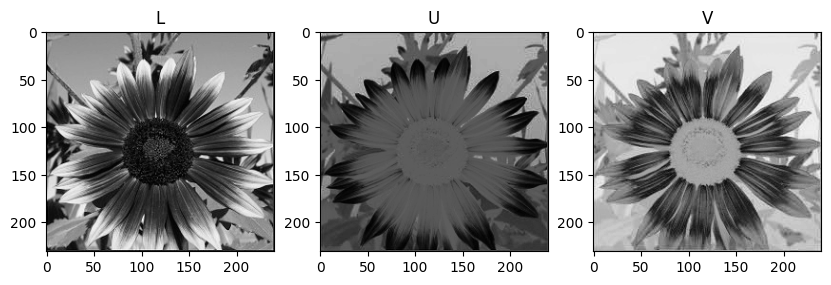

In [16]:
# your code here
img_ = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Luv)

plt.figure(figsize=[5, 5])
plt.imshow(img_)

# Split the image into color channels
l, u, v = cv2.split(img_)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(l, cmap="gray")
plt.title('L')

plt.subplot(132)
plt.imshow(u, cmap="gray")
plt.title('U')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('V')

# Display the plot
plt.show()


## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**

М. облегчить коррекцию цвета и управление контрастом.
В задачах компьютерного зрения м. упростить анализ цветовых характеристик объектов.


## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [17]:
def visualize_hist(hist, text=None):
    plt.figure(figsize=[20, 5])
    plt.title(text)
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [18]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [19]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

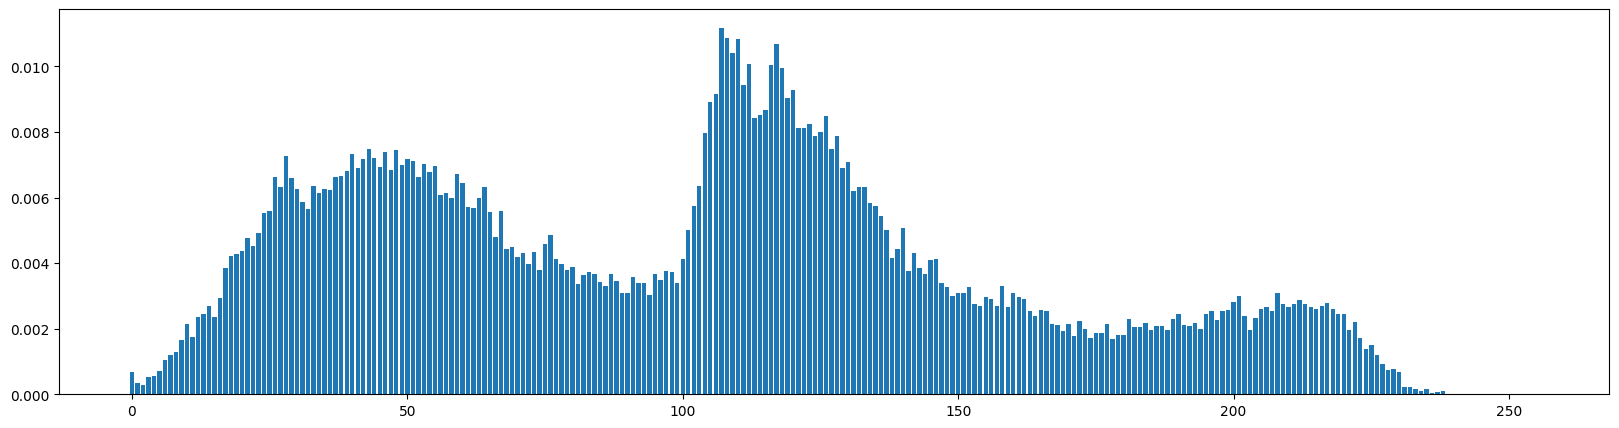

In [20]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [21]:
def compute_hist(img):
    pixels = img.flatten()
    hist = np.zeros(256)
    for pixel in pixels:
        hist[pixel] += 1
    return hist

In [22]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

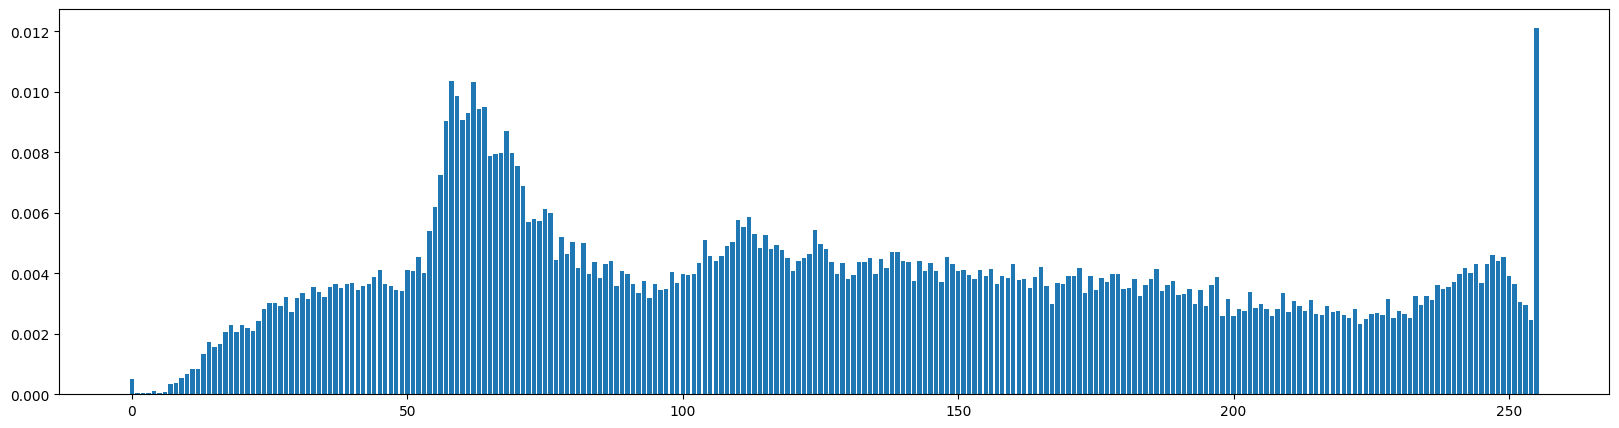

In [23]:
visualize_hist(hist_r)

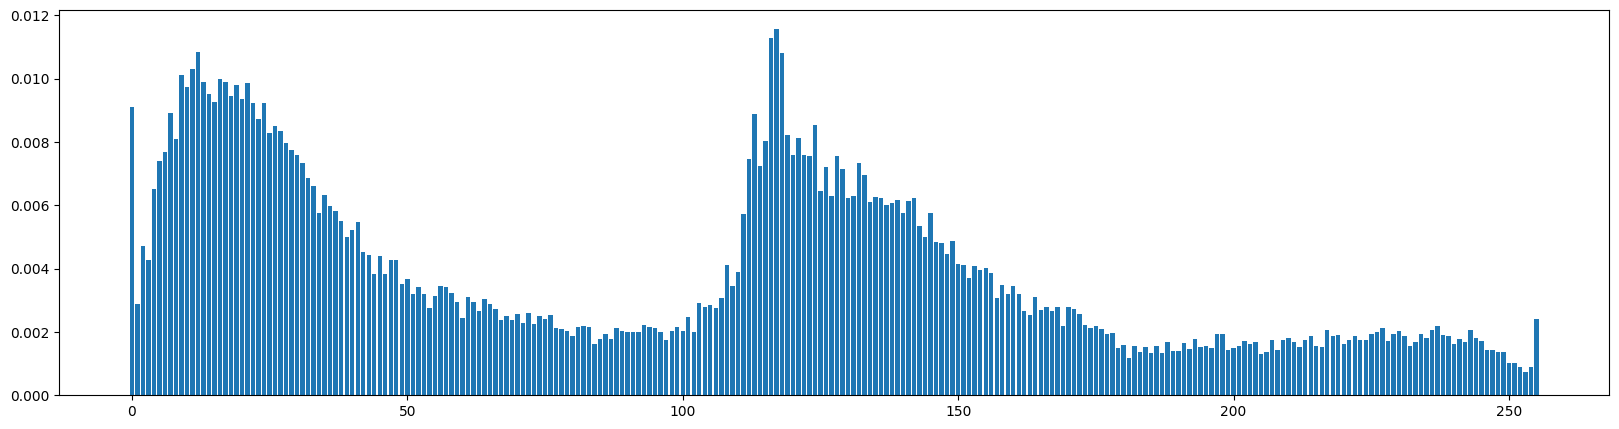

In [24]:
visualize_hist(hist_g)

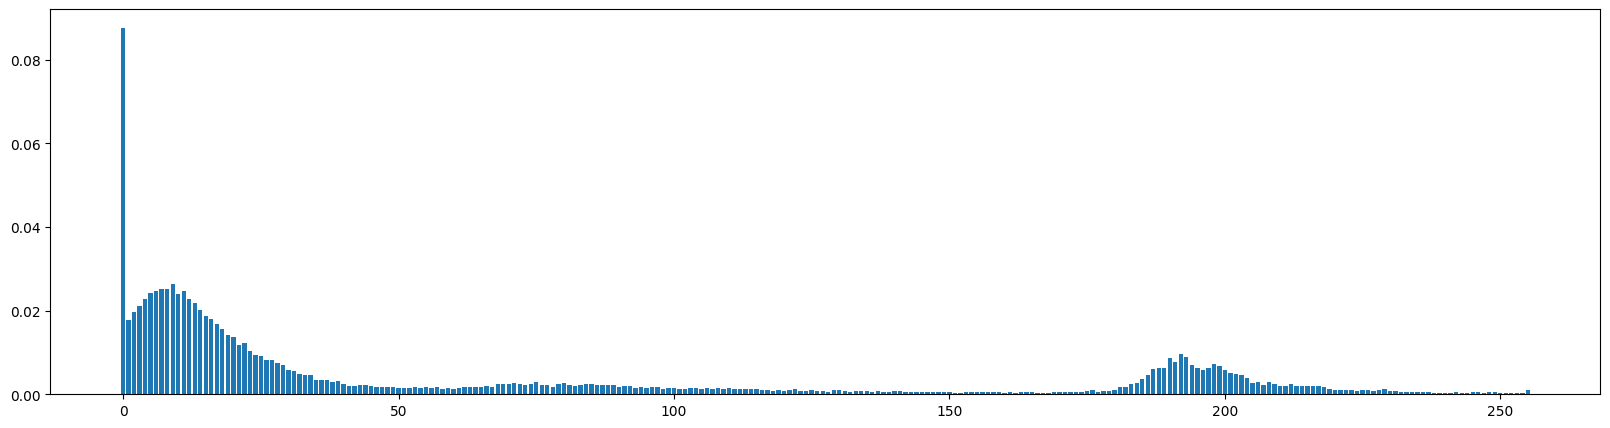

In [25]:
visualize_hist(hist_b)

In [26]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

Гистограмма изображения представляет собой графическое представление распределения яркости (или цветовой информации) по всем пикселям изображения. Ширина гистограммы может указывать на динамический диапазон изображения. Если гистограмма обрывается с одной или обеих сторон, это может указывать на насыщенные пиксели. Шум в изображении может проявляться в виде случайных колебаний в гистограмме. Также, на гистограмме могут отображаться некоторые особенности объектов, например - тени.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:**

Смена сцен и изменения освещения могут приводить к резким изменениям яркости и цвета на изображении, что отразится в гистограмме. Например, сцены в темноте могут иметь гистограмму, смещенную влево, в то время как яркие сцены могут вызвать смещение вправо. Использование различных эффектов освещения, таких как световые мерцания, могут вызывать изменения в интенсивности цветов. Применение цветовых фильтров или тоновых эффектов в фильме может изменять баланс цветов и форму гистограммы. Движущиеся объекты так же могут повлиять на гистограмму.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

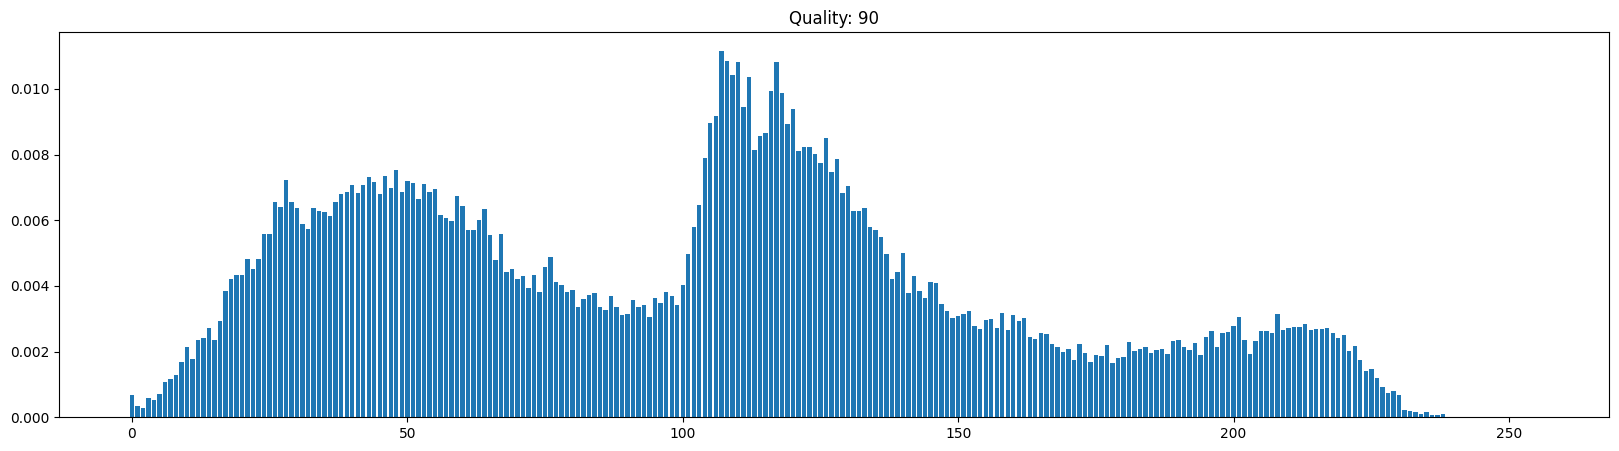

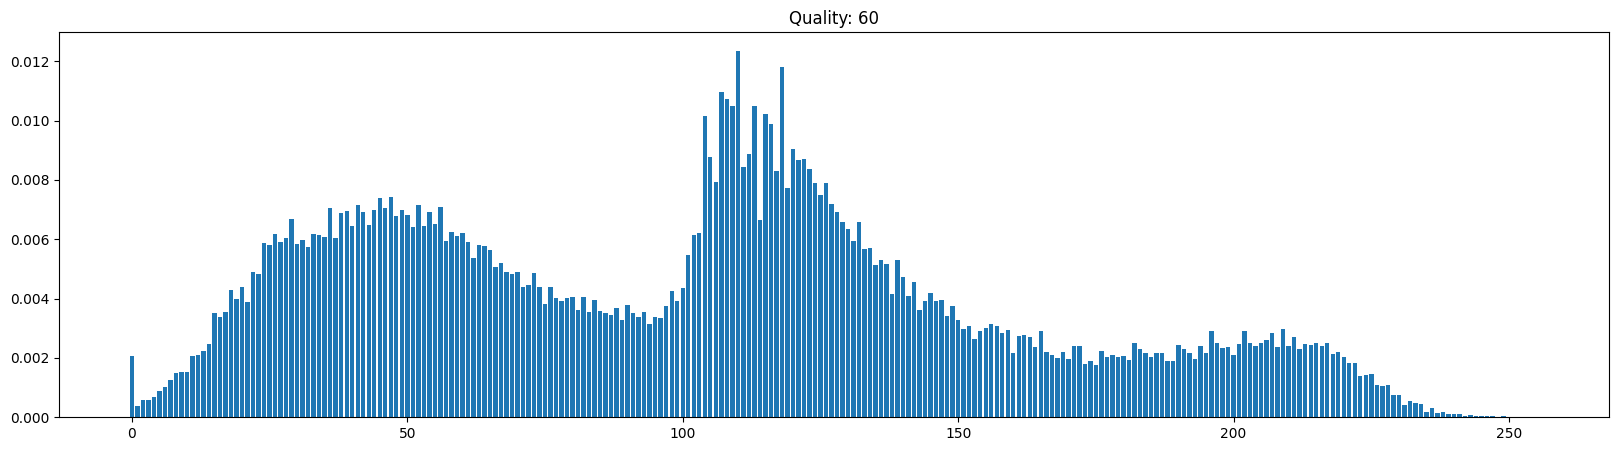

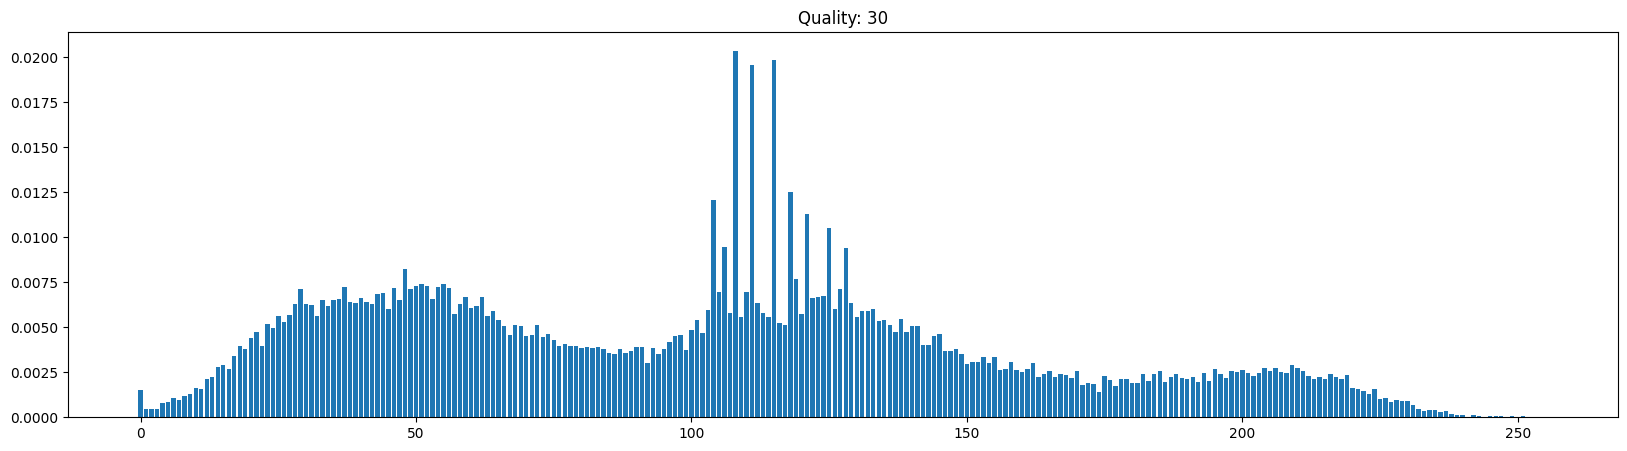

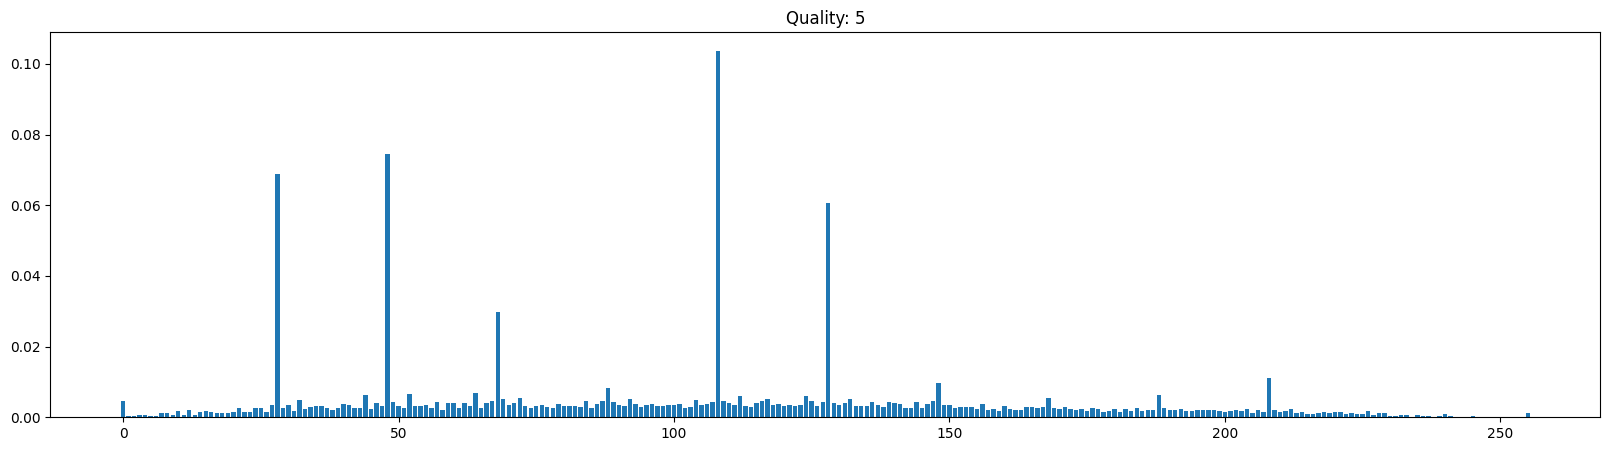

In [27]:
# your code here
import io
from PIL import Image

def compress_and_plot(img_gray, quality):
    # Compress the image
    img = Image.fromarray(img_gray)
    buffer = io.BytesIO()
    img.save(buffer, format="JPEG", quality=quality)
    buffer.seek(0)
    
    # Decompress the image
    img_jpeg = Image.open(buffer)
    img_jpeg = np.array(img_jpeg)

    # Plot the histogram
    hist = compute_hist(img_jpeg)
    visualize_hist(hist, text=f"Quality: {quality}")

# Convert the image to grayscale and save as JPEG with different qualities
qualities = [90, 60, 30, 5]
for quality in qualities:
    compress_and_plot(img_gray, quality)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

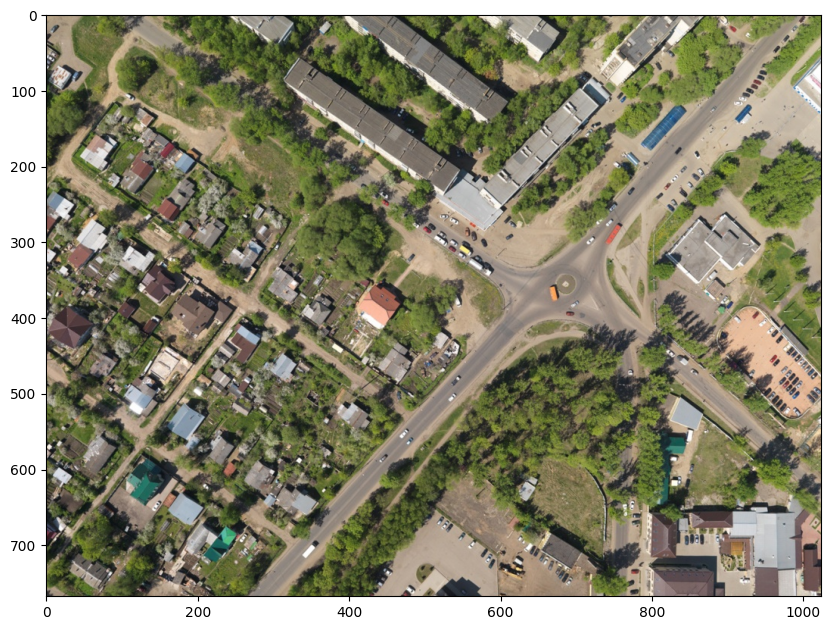

In [31]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

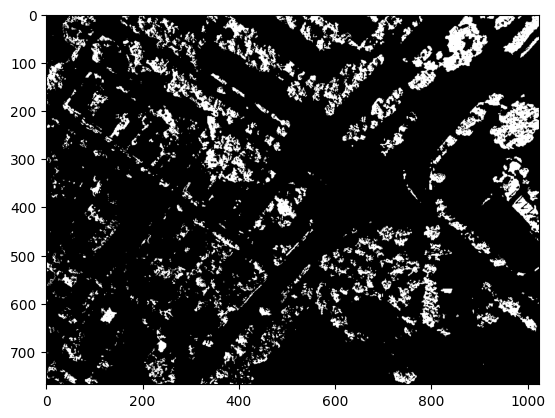

Green ratio: 12.14%


In [33]:
# your code here

hsv = cv2.cvtColor(aerial_image, cv2.COLOR_BGR2HSV)
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

plt.imshow(mask, cmap='gray')
plt.show()

green_ratio = np.sum(mask == 255) / (mask.shape[0] * mask.shape[1])
print(f'Green ratio: {green_ratio * 100:.2f}%')

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [34]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        # your code here
        self.integral_image = np.cumsum(np.cumsum(img, axis=0), axis=1)


    def sum(self, x, y, w, h):
        # your code here
        total = self.integral_image[y+h-1, x+w-1]
        left = self.integral_image[y+h-1, x-1] if x > 0 else 0
        above = self.integral_image[y-1, x+w-1] if y > 0 else 0
        above_left = self.integral_image[y-1, x-1] if x > 0 and y > 0 else 0
        return total - left - above + above_left



In [35]:
I = IntegralImage(img_gray)

In [36]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

/var/folders/jq/m06z1nsx31z945t56lzkybjh0000gn/T/ipykernel_29709/1371328062.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return total - left - above + above_left
/var/folders/jq/m06z1nsx31z945t56lzkybjh0000gn/T/ipykernel_29709/1371328062.py:18: RuntimeWarning: overflow encountered in scalar add
  return total - left - above + above_left


## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

Быстрый расчет суммарной яркости, обработка изображений в реальном времени, алгоритмы выделения объектов, выделение ROI, фильтрация изображений, трекинг объектов, анализ текстур и паттернов.

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
Динамическое программирование